# Machine Learning Techniques for Classification using Images Dataset

## Exploration and Preprocessing

[INFO] extracting image features...


/Users/rodrigolopezdetoledo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


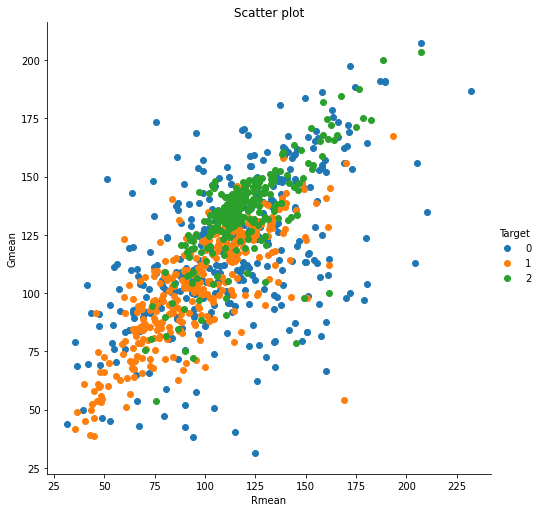

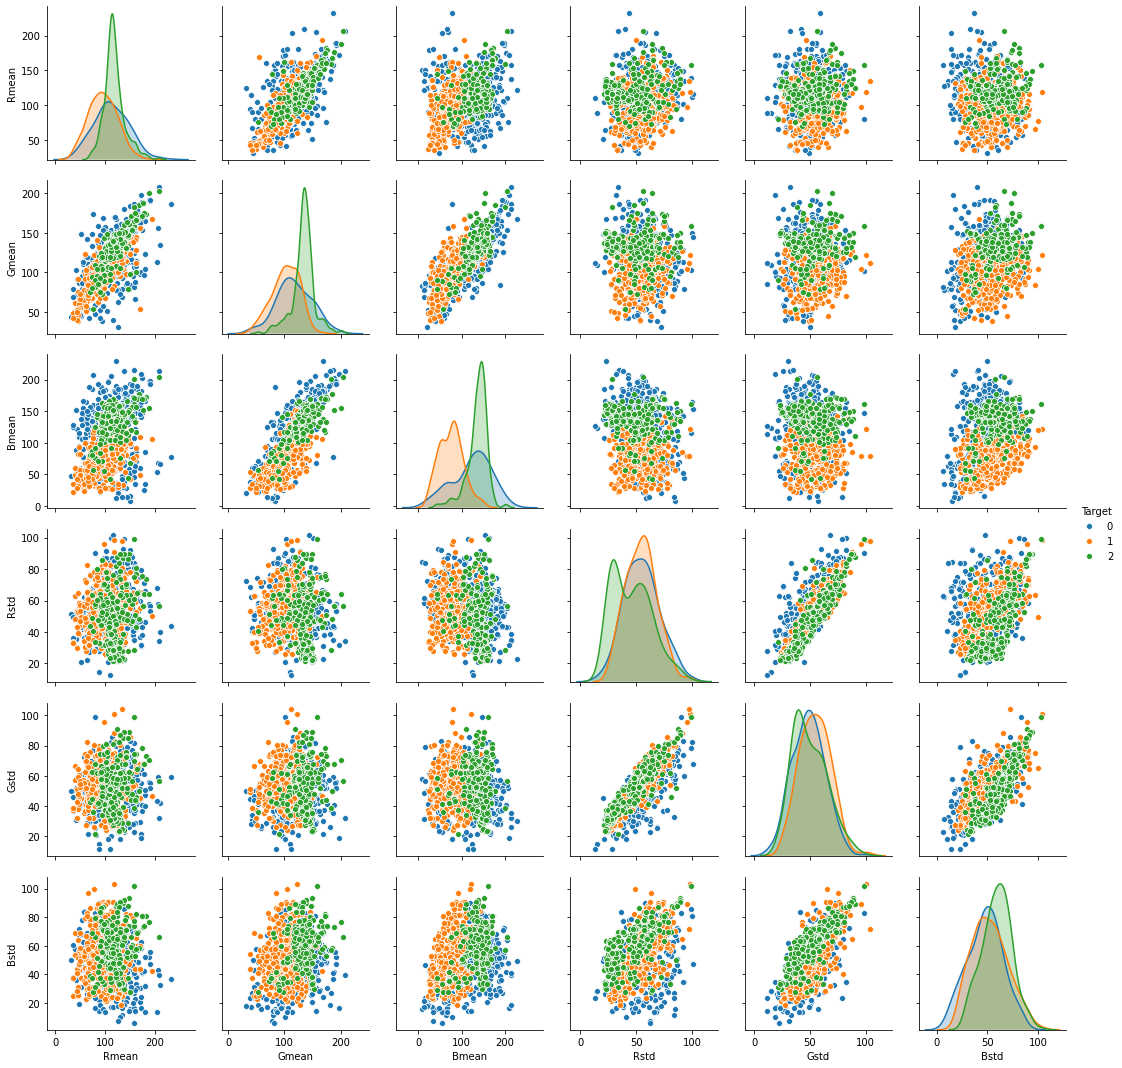

In [64]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
import seaborn as sns
import numpy as np
from sklearn.externals.six import StringIO  
#from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.colors as colors
import itertools
from scipy.stats import norm
import scipy.stats

def extract_color_stats(image):
	# split the input image into its respective RGB color channels
	# and then create a feature vector with 6 values: the mean and
	# standard deviation for each of the 3 channels, respectively
	(R, G, B) = image.split()
	features = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
		np.std(G), np.std(B)]

	# return our set of features
	return features

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", type=str, default="3scenes",
#	help="path to directory containing the '3scenes' dataset")
#ap.add_argument("-m", "--model", type=str, default="knn",
#	help="type of python machine learning model to use")
#args = vars(ap.parse_args())

# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=1),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="linear"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

# grab all image paths in the input dataset directory, initialize our
# list of extracted features and corresponding labels
print("[INFO] extracting image features...")
imagePaths = paths.list_images("3scenes")
data = []
labels = []

# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, compute color channel
	# statistics, and then update our data list
	image = Image.open(imagePath)
	features = extract_color_stats(image)
	data.append(features)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
trainX, testX, trainY, testY = train_test_split(data, labels,test_size=0.25)

##Transforming into DataFrame
df = pd.DataFrame(data,columns = ['Rmean', 'Gmean', 'Bmean', 'Rstd','Gstd', 'Bstd'])
df['Target'] = labels
df.head()

## Basic Visualization
sns.FacetGrid(df, hue="Target", size=7) .map(plt.scatter,"Rmean", "Gmean", )  .add_legend()
plt.title('Scatter plot')
df1 = df[["Rmean", "Gmean","Bmean","Target"]]

sns.pairplot( data=df, vars=('Rmean', 'Gmean', 'Bmean', 'Rstd','Gstd', 'Bstd'), hue='Target' )

## K-Nearest Neighbors 

In [44]:
#Train the model
print("[INFO] using '{}' model".format(models["knn"]))
model = models["knn"]

###
sc = StandardScaler()
sc.fit(trainX)

X_train_std = sc.transform(trainX)
X_test_std = sc.transform(testX)

model.fit(X_train_std[:,:2], trainY)
###

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(X_test_std[:,:2])
print(classification_report(testY, predictions,target_names=le.classes_))

[INFO] using 'KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')' model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.58      0.56      0.57        94
      forest       0.53      0.65      0.58        71
     highway       0.63      0.51      0.56        72

    accuracy                           0.57       237
   macro avg       0.58      0.58      0.57       237
weighted avg       0.58      0.57      0.57       237



Populating the interactive namespace from numpy and matplotlib


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


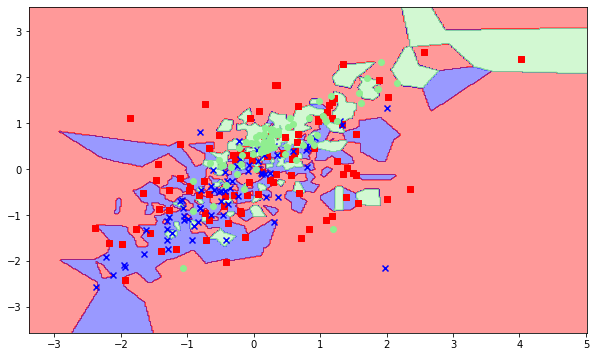

In [41]:
# Visualizing the model
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],c=cmap(idx), marker=markers[idx], label=cl)

plot_decision_regions(X_test_std[:,:2], testY, model)


## Naive Bayes

In [60]:
#Train the model with Naive Bayes
trainX, testX, trainY, testY = train_test_split(data, labels,test_size=0.25)
model = models["naive_bayes"]

#Fit the model applying feature selection
model.fit(trainX[:,:2], trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX[:,:2])
print(classification_report(testY, predictions,target_names=le.classes_))

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.81      0.32      0.46       105
      forest       0.64      0.82      0.72        73
     highway       0.50      0.85      0.62        59

    accuracy                           0.61       237
   macro avg       0.65      0.66      0.60       237
weighted avg       0.68      0.61      0.58       237



/Users/rodrigolopezdetoledo/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: operands could not be broadcast together with shapes (1,2) (6,) 

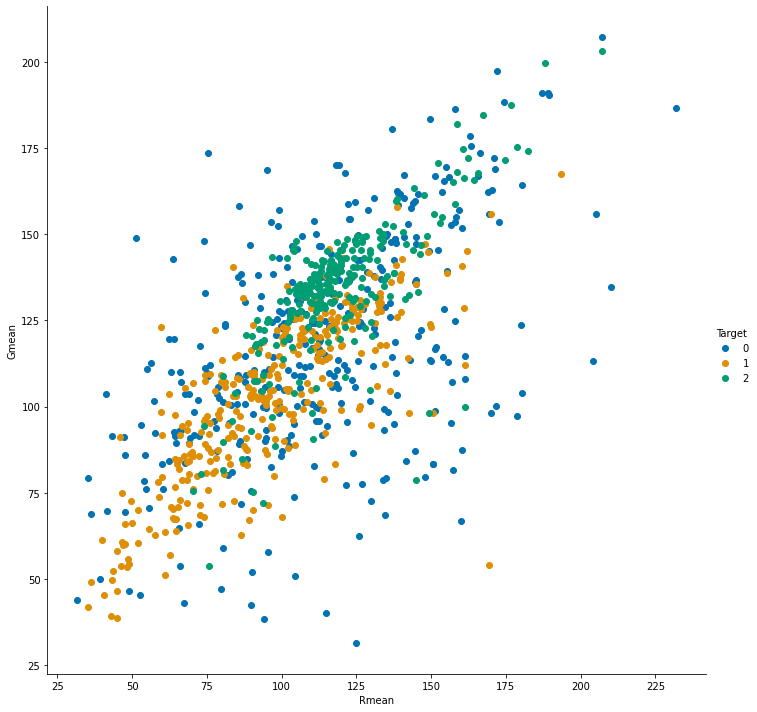

In [52]:
# Visualizing the model
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df, hue="Target", size=10, palette = 'colorblind') .map(plt.scatter, "Rmean", "Gmean",)  .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array(  [model.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','red','green'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','red','green'))

# Addd axis and title
my_ax.set_xlabel('Rmean')
my_ax.set_ylabel('Gmean')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()


## Logistic Regresion 

In [65]:
# Train the model with Logistic Regression
print("[INFO] using '{}' model".format(models["logit"]))
clf = linear_model.LogisticRegression(solver="lbfgs", multi_class="auto")
clf.fit(trainX[:, :2], trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = clf.predict(testX[:, :2])
print(classification_report(testY, predictions,target_names=le.classes_))

[INFO] using 'LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)' model


TypeError: list indices must be integers or slices, not tuple

In [7]:
# Train the model with SVM
print("[INFO] using '{}' model".format(models["svm"]))
#model = models[args["model"]]
models["svm"].fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = models["svm"].predict(testX)
print(classification_report(testY, predictions,
	target_names=le.classes_))

[INFO] using 'SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.69      0.82      0.75        93
      forest       0.85      0.85      0.85        79
     highway       0.73      0.54      0.62        65

    accuracy                           0.75       237
   macro avg       0.76      0.73      0.74       237
weighted avg       0.75      0.75      0.75       237



In [8]:
# train the model Decision Trees
print("[INFO] using '{}' model".format(models["decision_tree"]))
#model = models[args["model"]]
models["decision_tree"].fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = models["decision_tree"].predict(testX)
print(classification_report(testY, predictions,
	target_names=le.classes_))

[INFO] using 'DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')' model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.70      0.70      0.70        93
      forest       0.73      0.81      0.77        79
     highway       0.70      0.60      0.64        65

    accuracy                           0.71       237
   macro avg       0.71      0.70      0.70       237
weighted avg       0.71      0.71      0.71       237



In [9]:
# train the model with Random Forest
print("[INFO] using '{}' model".format(models["random_forest"]))
#model = models[args["model"]]
models["random_forest"].fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = models["random_forest"].predict(testX)
print(classification_report(testY, predictions,
	target_names=le.classes_))

[INFO] using 'RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.81      0.82      0.81        93
      forest       0.78      0.86      0.82        79
     highway       0.80      0.69      0.74        65

    accuracy                           0.80       237
   macro avg       0.80      0.79      0.79       237
weighted avg       0.80      0.80      0.80       237



In [10]:
# train the model with Perceptron
print("[INFO] using '{}' model".format(models["mlp"]))
#model = models[args["model"]]
models["mlp"].fit(trainX, trainY)

# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = models["mlp"].predict(testX)
print(classification_report(testY, predictions,
	target_names=le.classes_))

[INFO] using 'MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)' model
[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.75      0.85      0.80        93
      forest       0.79      0.87      0.83        79
     highway       0.80      0.55      0.65        65

    accuracy                           0.78       237
   macro avg       0.78      0.76      0.76       237
weighted avg       0.78      0.78      0.77       237

